### Cluster-wise rice yield vs. NPK fertilizer consumption per area

Let us recap the work done so far. Firstly, we cleaned and merged district-level annual data from several ICRISAT databases into a single collection. Our resulting data set [`rice_yield.csv`](https://github.com/akshaysuresh1/may22-barrel/blob/main/Final_data/rice_yield.csv) contains the following data columns.

`Dist Code`: District code <br>
`Year`: Year <br>
`Dist Name`: District name <br>
`State Name`: State name <br>
`RICE AREA (1000 ha)`: Gross cropped area of rice in units of 1000 hectares <br>
`RICE YIELD (kg per ha)`: Rice yield (kg/ha) <br>
`nitrogen`: tonnes of nitogen fertilizer used <br>
`phosphate`: tonnes of phosphate fertilizer used <br>
`potash`: tonnes of potash fertilizer used <br>
`prec_grow`: Average monthly precipitation (mm) during growing season <br>
`prec_harvest`: Average monthly precipitation (mm) during harvesting season <br>
`et_grow`: Average monthly evapotranspiration (mm) during growing season <br>
`et_harvest`: Average monthly evapotranspiration (mm) during harvesting season <br>
`maxT_grow`: Average of monthly maximum temperatures (celsius) during growing season <br>
`maxT_harvest`: Average of monthly maximum temperatures (celsius) during harvesting season <br>
`minT_grow`: Average of monthly minimum temperatures (celsius) during growing season <br>
`minT_harvest`: Average of monthly minimum temperatures (celsius) during harvesting season <br>
`runoff_grow`: Mean surface runoff (mm) during growing season <br>
`runoff_harvest`: Mean surface runoff (mm) during harvesting season <br>
`windspeed_grow`: Mean wind speed (m/s) during growing season <br>
`windspeed_harvest`: Mean wind speed (m/s) during harvesting season <br>
`RICE IRRIGATED AREA (1000 ha)`: Rice-irrigated area in units of 1000 hectares <br>
`RA-IA`: Difference between cropped area and irrigated area of rice (1000 hecatres) <br>

Based on our exploratory analysis, we selected a subset of environmental parameters (`prec_grow`, `prec_harvest`, `maxT_grow`, `maxT_harvest`, `minT_grow`, `minT_harvest`, `et_grow`, `et_harvest`, `windspeed_grow` and `windspeed_harvest`) and their mutual correlations to group  districts into "clusters." The underlying principle here is that districts within the same cluster share similiar environments for rice cultivation. <br>

Here, we will explore the impact of fertilizer consumption per unit cropped area on annual rice yield for each cluster. Note that policy makers are interested in the reverse problem, i.e., the mass of fertilizer required to obtain a certain yield of rice. <br>

In [1]:
# Load relevant packages.
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clustered data.
df = pd.read_csv('../Final_data/rice_yield_clusters.csv')

In [3]:
# Load shapefile of Indian districts.
shp = gpd.read_file('../Final_data/districts2020_clusters.shp')

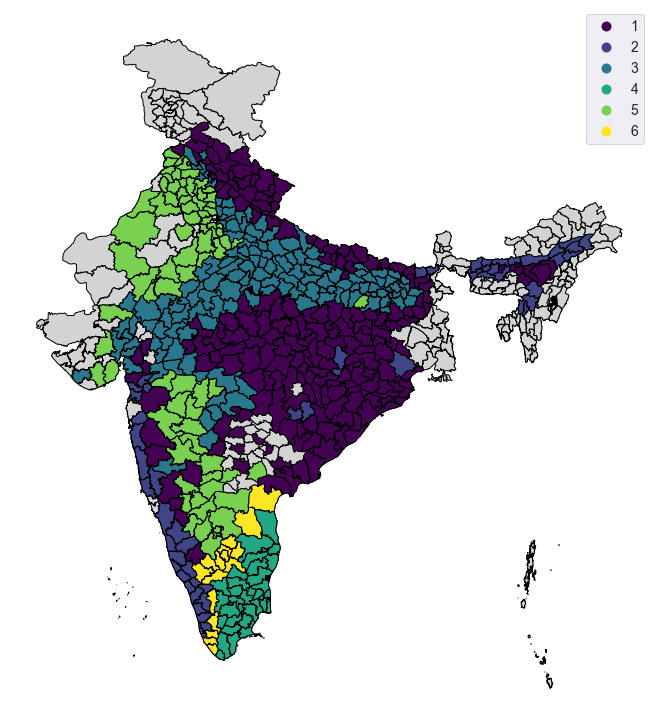

In [4]:
# Visualize spatial distribution of clusters.
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='cluster', edgecolor='black', cmap='viridis', legend=False, categorical=True, 
        missing_kwds={'color': 'lightgrey'})
# Show map without NaNs.
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs.cluster.astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
noNaNs.plot(ax=ax, column='cluster', edgecolor='black', cmap='viridis', legend=True, categorical=True,
                  legend_kwds=legend_kwds)
# Hide axes.
ax.set_axis_off()
plt.show()

In the above map, we have a total of 6 clusters. Each color corresponds to a different cluster number. Grey areas represent districts with missing or insufficient data.

To start off, let's convert fertilizer consumption to units of kg/ha.

In [5]:
# Compute fertilizer consumption per unit area.
df['N_per_area'] = df['nitrogen']/df['RICE.AREA..1000.ha.']
df['P_per_area'] = df['phosphate']/df['RICE.AREA..1000.ha.']
df['K_per_area'] = df['potash']/df['RICE.AREA..1000.ha.']

###  Rice yield vs. fertilizer consumption per unit area

In [6]:
N_clusters = df['Cluster'].max()


Plotting for cluster 1
No. of samples in cluster 1 = 4027


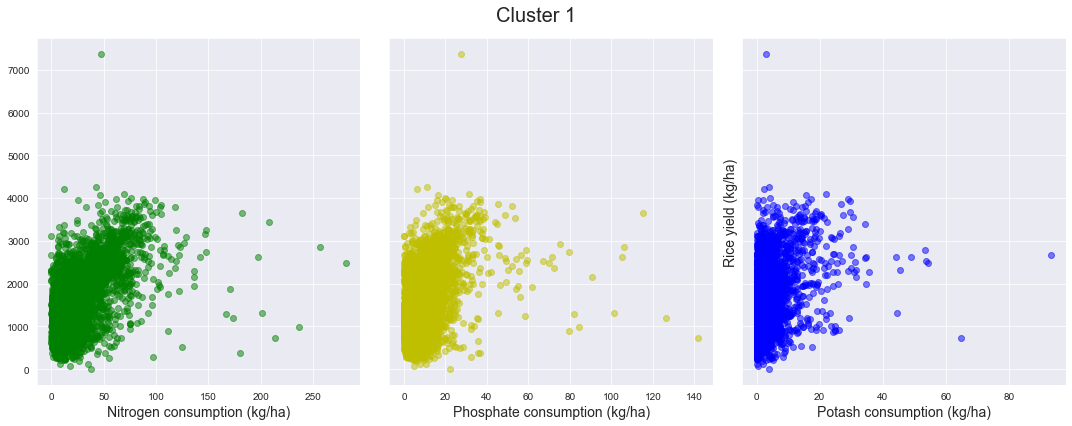


Plotting for cluster 2
No. of samples in cluster 2 = 869


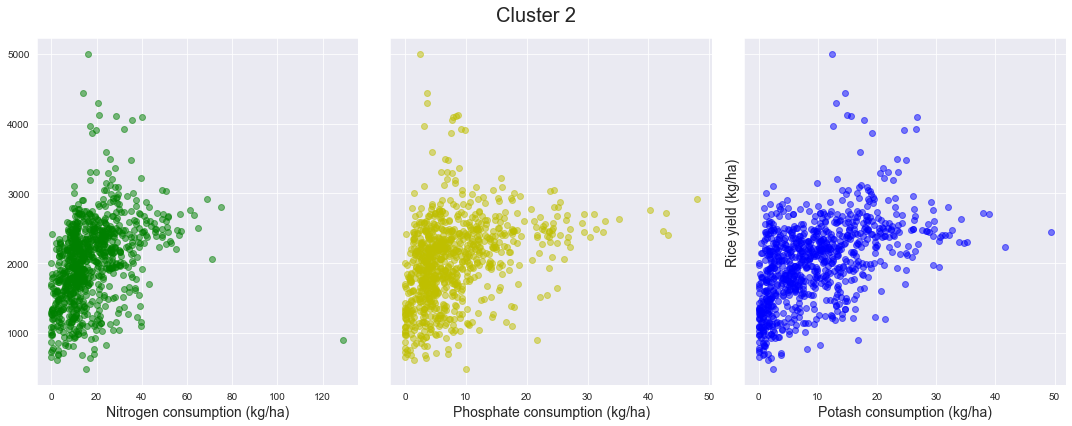


Plotting for cluster 3
No. of samples in cluster 3 = 3009


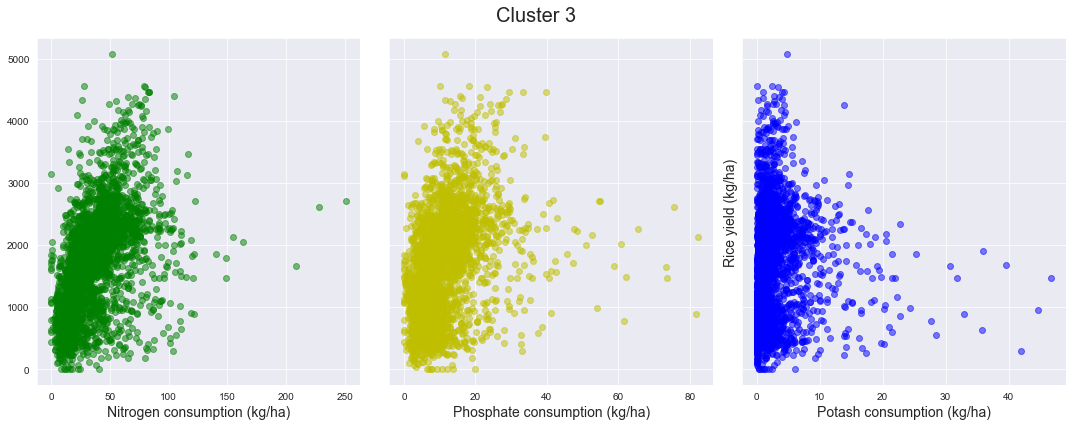


Plotting for cluster 4
No. of samples in cluster 4 = 699


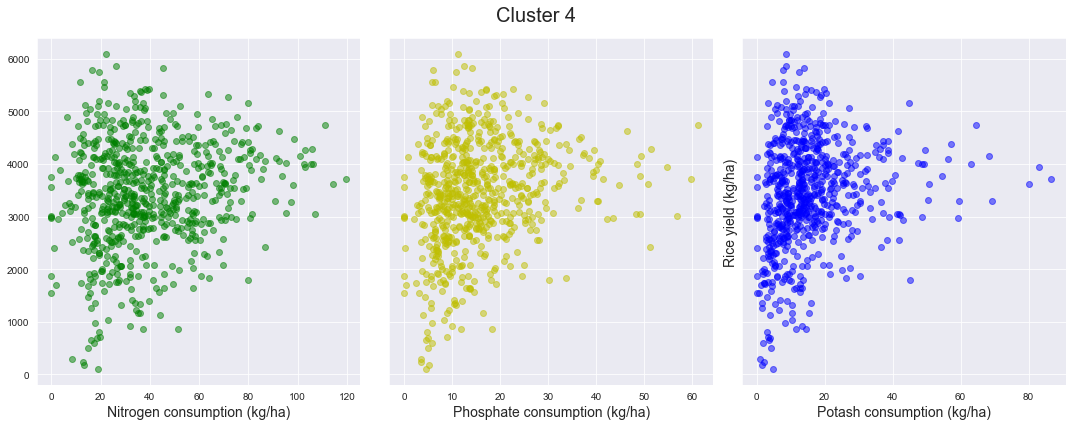


Plotting for cluster 5
No. of samples in cluster 5 = 1516


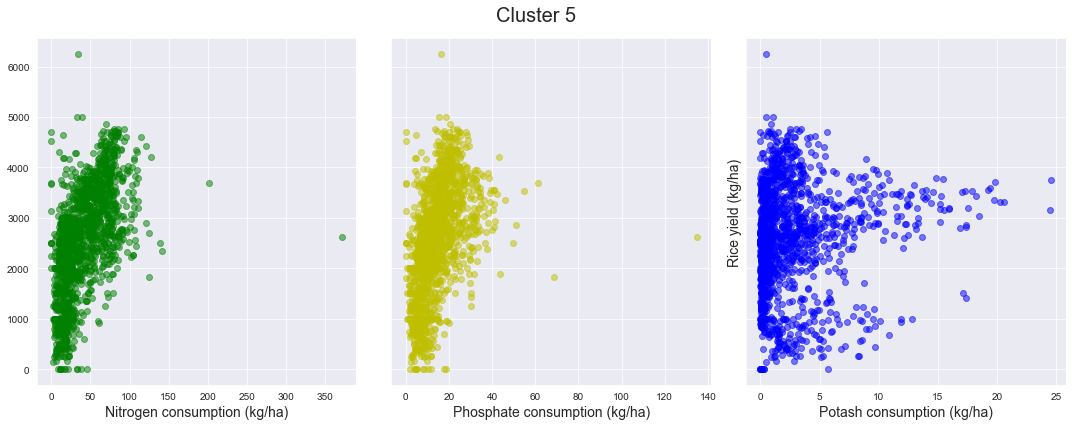


Plotting for cluster 6
No. of samples in cluster 6 = 360


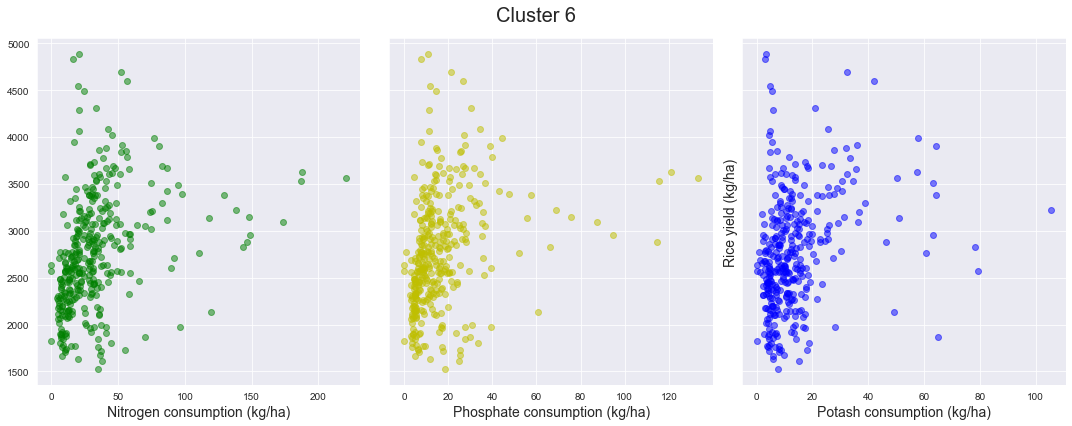

In [8]:
for i in range(1, N_clusters+1):
    print('\nPlotting for cluster %d'% (i))
    selection = df[df['Cluster']==i]
    print('No. of samples in cluster %d = %d'% (i, len(selection)))
    
    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6), tight_layout=True, sharey=True)
    # Axes 0: Rice yield (kg/ha) vs. nitrogen consumption (kg/ha)
    axes[0].scatter(x=selection['N_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='g', alpha=0.5)
    axes[0].set_xlabel('Nitrogen consumption (kg/ha)', fontsize=14)
    # Axes 1: Rice yield (kg/ha) vs. phosphate consumption (kg/ha)
    axes[1].scatter(x=selection['P_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='y', alpha=0.5)
    axes[1].set_xlabel('Phosphate consumption (kg/ha)', fontsize=14)
    # Axes 1: Rice yield (kg/ha) vs. potash consumption (kg/ha)
    axes[2].scatter(x=selection['K_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='b', alpha=0.5)
    axes[2].set_xlabel('Potash consumption (kg/ha)', fontsize=14)
    axes[2].set_ylabel('Rice yield (kg/ha)', fontsize=14)
    # Title
    fig.suptitle('Cluster %d'% (i), fontsize=20)
    plt.show()
    